# Attributes Control Charts

The following notebook has been prepared for students in my Statistics 193.1 Introduction to Statistical Quality Control class. Data and examples are taken from Montgomery (2009).

Install required libraries (on first run only)

In [1]:
# install.packages("qcc") # for control charts
# install.packages("ggplotify")
# install.packages("gridExtra")

Load libraries

In [2]:
library(qcc)
library(ggplotify)
library(gridExtra)

Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Fraction Non-Conforming

Data for the first 30 samples in the orange juice data from Montgomery (2009). Contains only count of defects, for constant sample size n = 50.

In [12]:
orangejuice <- data.frame(D = c(12,15,8,10,4,7,16,9,14,
                                10,5,6,17,12,22,8,10,5,
                                13,11,20,18,24,15,9,12,
                                7,13,9,6))

head(orangejuice)

D
12
15
8
10
4
7


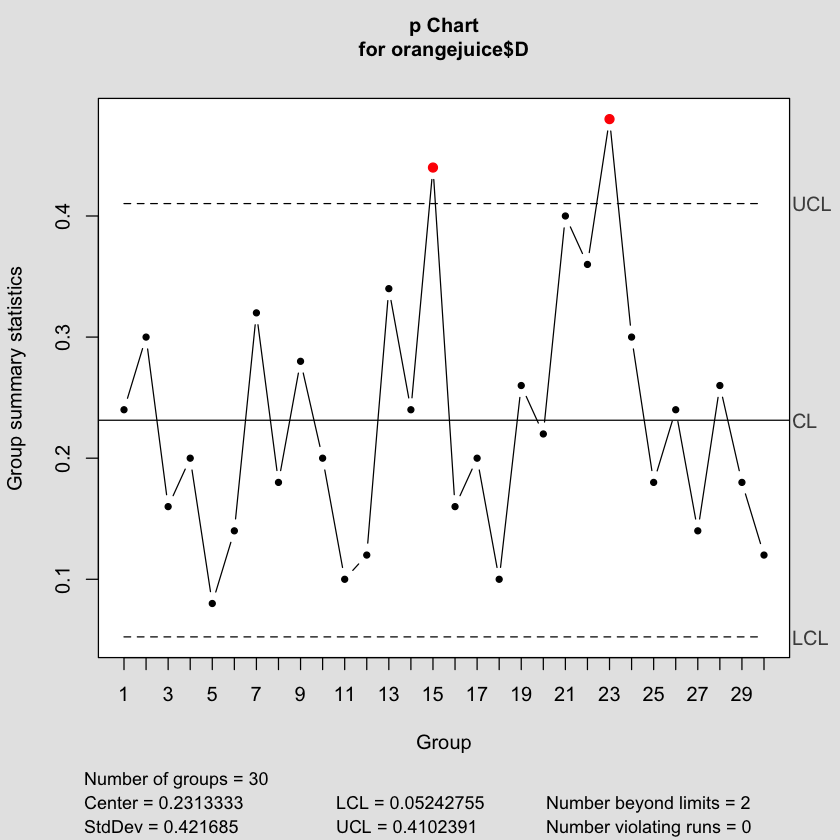

In [13]:
orange.pchart1 <- qcc(orangejuice$D, sizes = 50, type = "p")

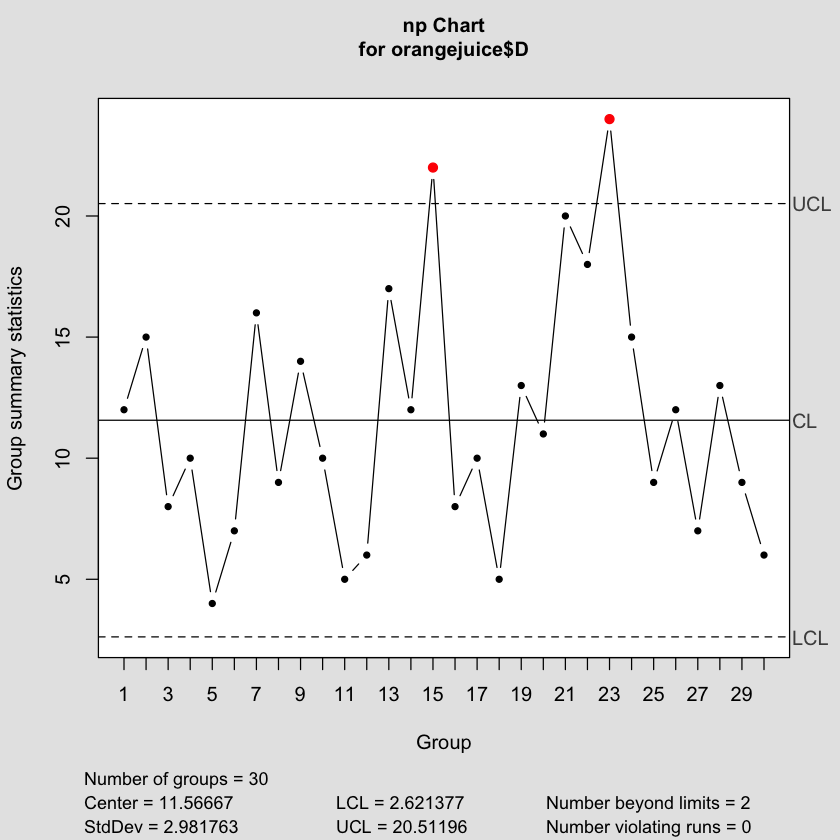

In [14]:
orange.npchart1 <- qcc(orangejuice$D, sizes = 50, type = "np")

Continuation of the orange juice data, for samples 31 to 54.

In [15]:
orangejuice2 <- data.frame(D = c(9,6,12,5,6,4,6,3,7,
                                 6,2,4,3,6,5,4,8,5,
                                 6,7,5,6,3,5))

head(orangejuice2)

D
9
6
12
5
6
4


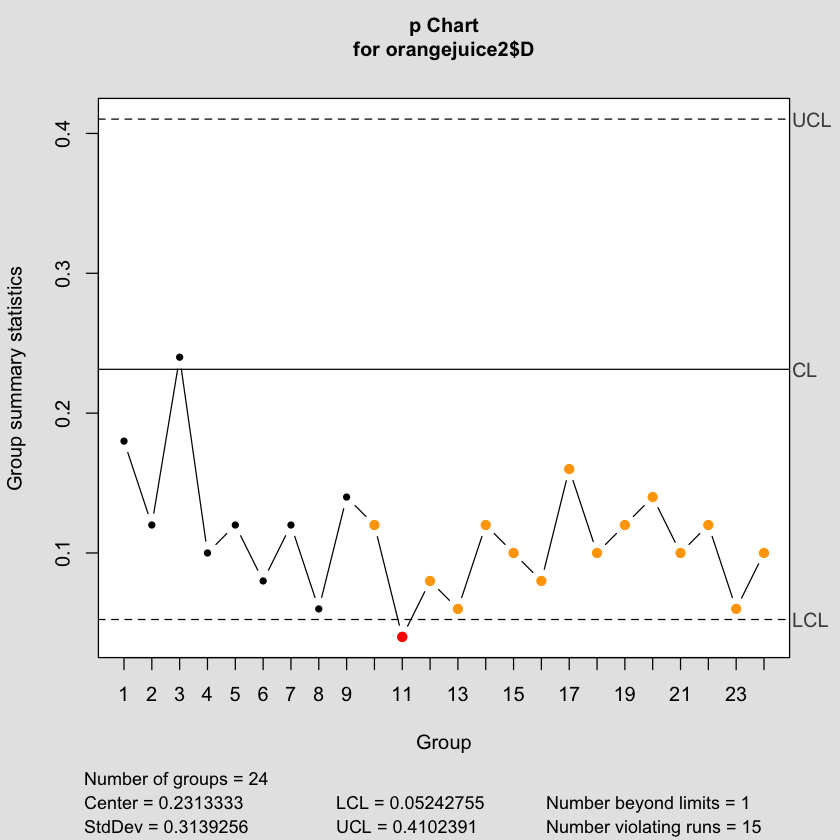

In [20]:
orange.pchart2 <- qcc(orangejuice2$D, sizes = 50, type = "p", limits = orange.pchart1$limits[1,],
                     center = orange.pchart1$center)

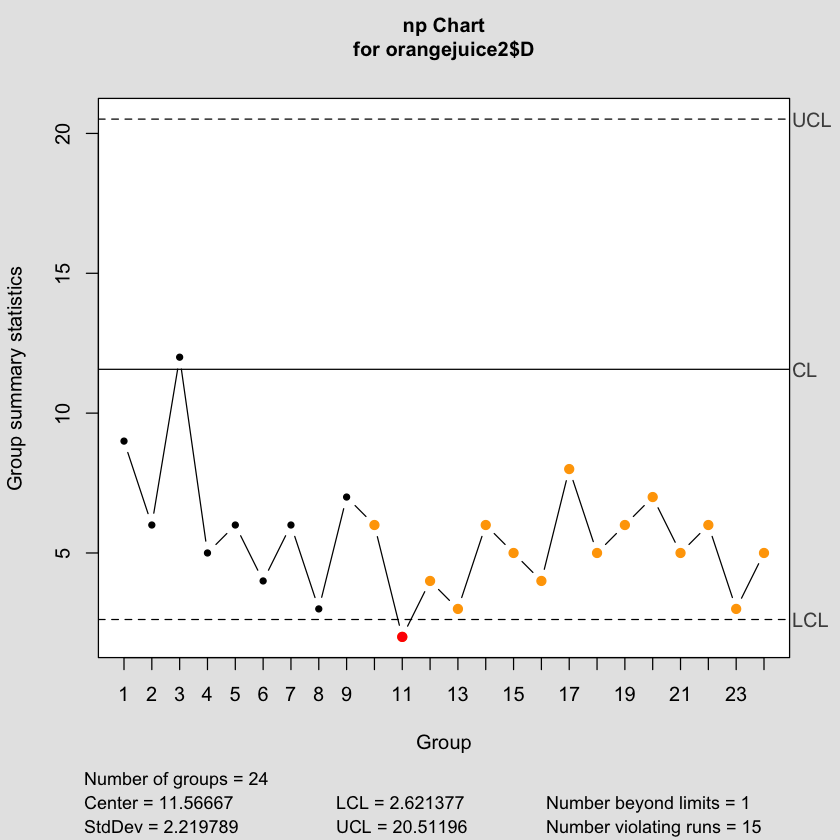

In [21]:
orange.npchart2 <- qcc(orangejuice2$D, sizes = 50, type = "np", limits = orange.npchart1$limits[1,],
                     center = orange.npchart1$center)

As an alternative, we can plot phase 2 charts appended to the phase 1 data by setting the `newdata` and `newsizes` argument in `qcc`.

List of 15
 $ call        : language qcc(data = orangejuice$D, type = "p", sizes = 50, newdata = orangejuice2$D,      newsizes = 50)
 $ type        : chr "p"
 $ data.name   : chr "orangejuice$D"
 $ data        : num [1:30, 1] 12 15 8 10 4 7 16 9 14 10 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics  : Named num [1:30] 0.24 0.3 0.16 0.2 0.08 0.14 0.32 0.18 0.28 0.2 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ sizes       : num [1:30] 50 50 50 50 50 50 50 50 50 50 ...
 $ center      : num 0.231
 $ std.dev     : num 0.422
 $ newstats    : Named num [1:24] 0.18 0.12 0.24 0.1 0.12 0.08 0.12 0.06 0.14 0.12 ...
  ..- attr(*, "names")= chr [1:24] "31" "32" "33" "34" ...
 $ newdata     : num [1:24, 1] 9 6 12 5 6 4 6 3 7 6 ...
 $ newsizes    : num [1:24] 50 50 50 50 50 50 50 50 50 50 ...
 $ newdata.name: chr "orangejuice2$D"
 $ nsigmas     : num 3
 $ limits      : num [1:54, 1:2] 0.0524 0.0524 0.0524 0.0524 0.0524 ...
  ..- attr(*, "dimnames")=List of 2
 $ violations  :Lis

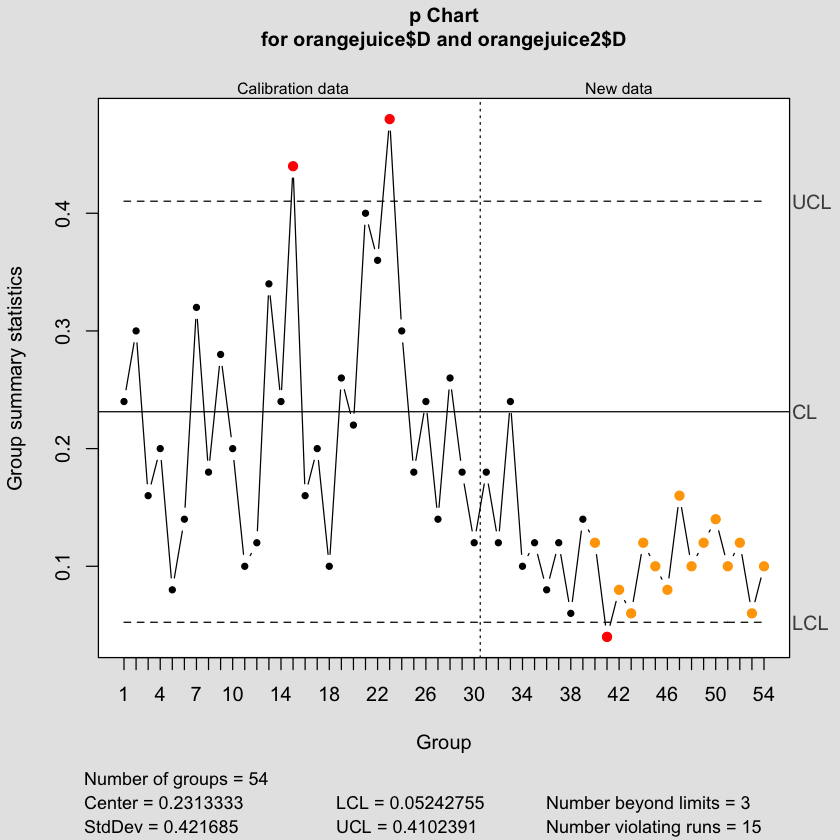

In [23]:
qcc(orangejuice$D, sizes = 50, type = "p", newdata = orangejuice2$D, newsizes = 50)

### Using Variable Sample Size

In [27]:
purchase1 <- data.frame(
    n = c(100,80,80,100,110,110,100,100,
          90,90,110,120,120,120,110,80,
          80,80,90,100,100,100,100,90,90),
    D = c(12,8,6,9,10,12,11,16,10,6,20,15,
          9,8,6,8,10,7,5,8,5,8,10,6,9)
)

head(purchase1)

n,D
100,12
80,8
80,6
100,9
110,10
110,12


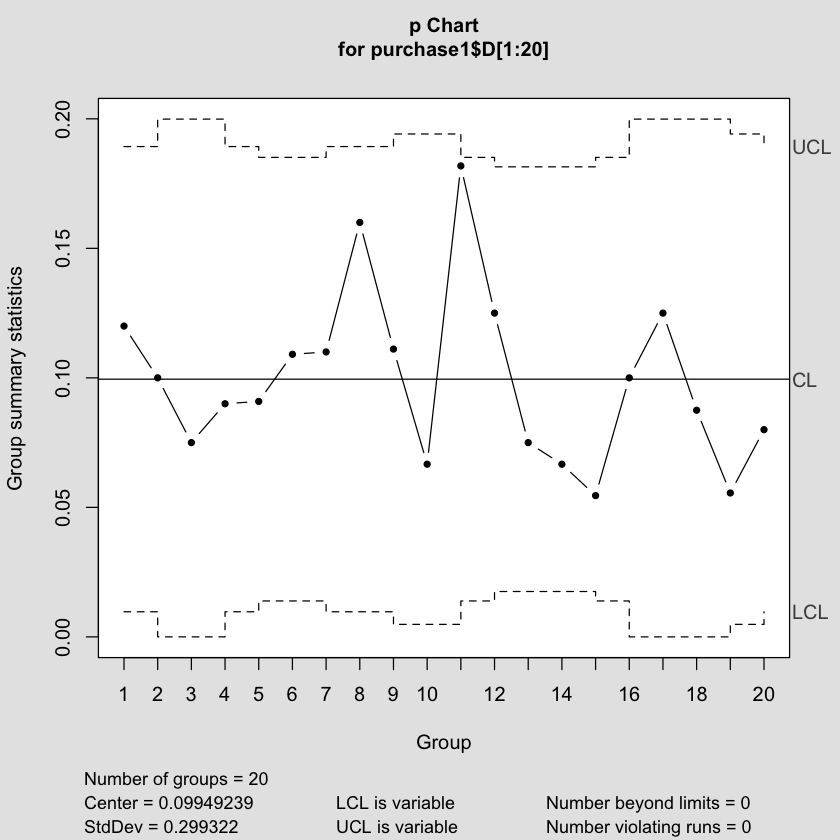

In [30]:
purchase.pchart1 <- qcc(purchase1$D[1:20], sizes = purchase1$n[1:20], type = "p")

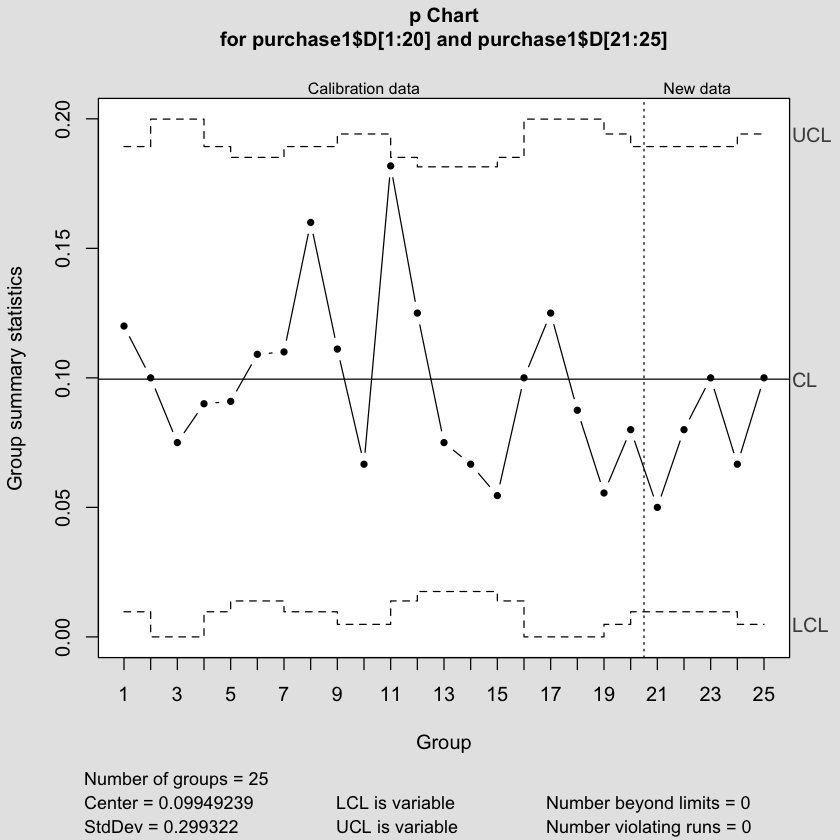

In [31]:
purchase.pchart2 <- qcc(purchase1$D[1:20], sizes = purchase1$n[1:20], type = "p",
                       newdata = purchase1$D[21:25], newsizes = purchase1$n[21:25])

### OC Curves for the Fraction Non-Conforming Chart

Warning message in oc.curves.p(object, ...):
“Some computed values for the type II error have been rounded due to the discreteness of the binomial distribution. Thus, some ARL values might be meaningless.”

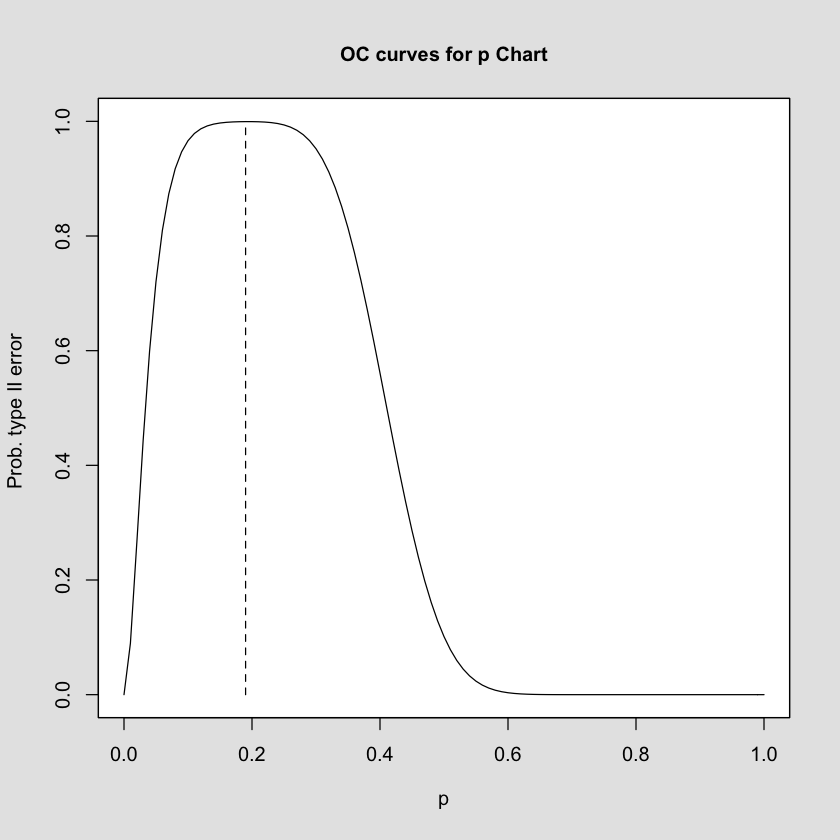

In [25]:
oc.curves(orange.pchart1)

## References

1. Douglas Montgomery. *Introduction to Statistical Quality Control, A Modern Introduction*. Hoboken, N.J. Wiley, 2009.
2. Luca Scrucca. qcc: an r package for quality control charting and statistical process control. *R News*, 4/1:11–17, 2004.